In [100]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 

# seaboarn lib add
import seaborn as sns

import time

%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
    print('d')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('w')
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# ml lib
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold , cross_val_score , cross_validate , GridSearchCV
from   sklearn.tree            import DecisionTreeClassifier
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.linear_model    import LogisticRegression

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , make_scorer , precision_recall_curve , roc_curve,roc_auc_score 

from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler ,Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

import missingno as msno 

import graphviz

from IPython.display import Image


print('sklearn version - ' , sklearn.__version__)

numpy version  -  1.20.3
pandas version -  1.3.2
d
sklearn version -  0.24.2


#### Roc curve and auc(의학분야에서 주로 사용)

- FPR : 실제값이 음성인데 양성으로 잘못 예측한 비율 => 건강한 사람을 질병이 있다고 판단 
- TPR : 실제값이 양성인 값들 중 양성으로 예측한 비율
- FPR이 변할때 TPR이 어떻게 변하는 나타내는 곡선
- FPR : X축 , TPR : Y축 

In [200]:
titanic_df = pd.read_csv('./Data/titanic_train.csv')
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
titanic_label    =  titanic_df['Survived']
titanic_features =  titanic_df.drop(['Survived'] , axis = 1)

print('label type - ' , type(titanic_label) , 'features type - ' , type(titanic_features))

label type -  <class 'pandas.core.series.Series'> features type -  <class 'pandas.core.frame.DataFrame'>


In [103]:
# 레일블 인코딩 Cabin , Sex , Embarked
def drop_features(frm):
    frm.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return frm


def pre_processing(frm):
    frm['Age'].fillna(frm['Age'].mean(), inplace=True)
    frm['Cabin'].fillna('N', inplace=True)
    frm['Embarked'].fillna('N', inplace=True)
    return frm


def label_encoder(frm):
    frm['Cabin'] = frm['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(frm[feature])
        frm[feature] = encoder.transform(frm[feature])
    return  frm

def transform_features(frm):
    frm = drop_features(frm)
    frm = pre_processing(frm)
    frm = label_encoder(frm)
    return frm

In [104]:
subset_features = transform_features(titanic_features)
subset_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [105]:
X_train , X_test , y_train , y_test = train_test_split(subset_features , 
                                                       titanic_label , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

In [151]:
def metrics_evaluation(target , prediction) :
    print('confusion_matrix \n' , confusion_matrix(target , prediction),end=' ')
    print()
    print('accuracy:'  , accuracy_score(target , prediction),end=' ')

    print('recall:'    , recall_score(target , prediction),end=' ')

    print('precision:' , precision_score(target , prediction),end=' ')

    print('f1 score:'  , f1_score(target , prediction),end=' ')
    print()
    
def metrics_evaluation_auc(target , prediction,pred_prob) :
    print('confusion_matrix \n' , confusion_matrix(target , prediction),end=' ')
    print()
    print('accuracy:'  , accuracy_score(target , prediction),end=' ')

    print('recall:'    , recall_score(target , prediction),end=' ')

    print('precision:' , precision_score(target , prediction),end=' ')

    print('f1 score:'  , f1_score(target , prediction),end=' ')

    print('auc score:'  , roc_auc_score(target , pred_prob),end=' ')
    print()

In [107]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_predict = lr_model.predict(X_test)
metrics_evaluation(y_test,y_predict)

****************************************************************************************************
confusion_matrix 
 [[90 14]
 [21 54]]

accuracy 
 0.8044692737430168

recall 
 0.72

precision 
 0.7941176470588235

f1 score 
 0.7552447552447551


In [108]:
# 확률에측 값
y_pred_proba = lr_model.predict_proba(X_test)
y_pred_proba

array([[0.16962082, 0.83037918],
       [0.27199194, 0.72800806],
       [0.89331487, 0.10668513],
       [0.41464977, 0.58535023],
       [0.8611959 , 0.1388041 ],
       [0.24556952, 0.75443048],
       [0.89699489, 0.10300511],
       [0.79142304, 0.20857696],
       [0.05956162, 0.94043838],
       [0.64007864, 0.35992136],
       [0.02380675, 0.97619325],
       [0.87147947, 0.12852053],
       [0.86795998, 0.13204002],
       [0.57852391, 0.42147609],
       [0.41531568, 0.58468432],
       [0.82166497, 0.17833503],
       [0.06700108, 0.93299892],
       [0.59614252, 0.40385748],
       [0.65232817, 0.34767183],
       [0.86655625, 0.13344375],
       [0.90386294, 0.09613706],
       [0.04297349, 0.95702651],
       [0.85636378, 0.14363622],
       [0.32579961, 0.67420039],
       [0.89720373, 0.10279627],
       [0.9038457 , 0.0961543 ],
       [0.31984026, 0.68015974],
       [0.83323737, 0.16676263],
       [0.9218366 , 0.0781634 ],
       [0.84000455, 0.15999545],
       [0.

In [109]:
# positive 확률예측 값
positive_y_pred_proba = y_pred_proba[:,1]

fprs,tprs,thresholds = roc_curve(y_test,positive_y_pred_proba)
fprs.shape , tprs.shape , thresholds.shape

((74,), (74,), (74,))

In [110]:
thr_idx = np.arange(1,74,6)

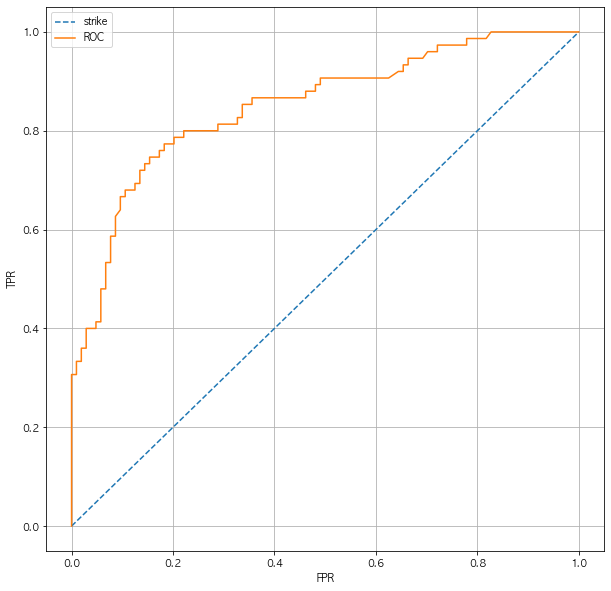

In [111]:
plt.figure(figsize = (10, 10))

plt.plot([0,1] ,[0,1] , linestyle='--' , label ='strike')
plt.plot(fprs,tprs,linestyle='-',label='ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.grid()
plt.legend()
plt.show()
plt.close()

In [112]:
metrics_evaluation_auc(y_test,y_predict,positive_y_pred_proba)

****************************************************************************************************
confusion_matrix 
 [[90 14]
 [21 54]]

accuracy 
 0.8044692737430168

recall 
 0.72

precision 
 0.7941176470588235

f1 score 
 0.7552447552447551

auc score 
 0.8503205128205128


#### 실습

In [160]:
diabetes_df = pd.read_csv('./Data/diabetes.csv')

diabetes_df.info()
diabetes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [161]:
diabetes_df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [162]:
# 모델생성 (3가지)
# 전처리(결측치 , 이상치 , 표준화&정규화)
# 모델 셀렉션 , 교차검증
# 학습, 예측, 평가
# 임계값 정밀도-재현율을 확인 및 시각화
# 분포확인


# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용하고 0값을 평균값으로 대체한 데이터 세트로 학습/예측
# 분류결정 임계값을 변경하면서 성능 측정

In [163]:
# 데이터 클린징 없이 모델 성능 예측
features = diabetes_df.drop('Outcome',axis=1)
label = diabetes_df['Outcome']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=100)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [180]:
# lr dt rf
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

print('Logistic Regression')
lr_model.fit(X_train,y_train)
lr_y_predict = lr_model.predict(X_test)
lr_model_pred_prob = lr_model.predict_proba(X_test)[:,1]
metrics_evaluation_auc(y_test,lr_y_predict,lr_model_pred_prob)
print()
print('Decision Tree')
dt_model.fit(X_train,y_train)
dt_y_predict = dt_model.predict(X_test)
dt_model_pred_prob = dt_model.predict_proba(X_test)[:,1]
metrics_evaluation_auc(y_test,dt_y_predict,dt_model_pred_prob)
print()
print('Random Forest')
rf_model.fit(X_train,y_train)
rf_y_predict = rf_model.predict(X_test)
rf_model_pred_prob = rf_model.predict_proba(X_test)[:,1]
metrics_evaluation_auc(y_test,rf_y_predict,rf_model_pred_prob)

Logistic Regression
confusion_matrix 
 [[87 14]
 [24 29]] 
accuracy: 0.7532467532467533 recall: 0.5471698113207547 precision: 0.6744186046511628 f1 score: 0.6041666666666666 auc score: 0.7829254623575566 

Decision Tree
confusion_matrix 
 [[80 21]
 [26 27]] 
accuracy: 0.6948051948051948 recall: 0.5094339622641509 precision: 0.5625 f1 score: 0.5346534653465346 auc score: 0.6507565850924716 

Random Forest
confusion_matrix 
 [[85 16]
 [24 29]] 
accuracy: 0.7402597402597403 recall: 0.5471698113207547 precision: 0.6444444444444445 f1 score: 0.5918367346938775 auc score: 0.7619092097889034 


In [144]:
def precision_recall_plot(y_test , pred_proba) : 
    
    precisions , recalls , thresholds = precision_recall_curve(y_test , pred_proba)
    
    plt.figure(figsize = (15, 5))

    plt.plot(thresholds , precisions[0 : thresholds.shape[0]] , linestyle='--' , label = 'precision')
    plt.plot(thresholds , recalls[0 : thresholds.shape[0]]    , linestyle='-'  , label = 'recall')

    start , end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1) , 2 ))
    plt.xlabel('threshold ratio')
    plt.ylabel('precision and recall value')

    plt.grid()
    plt.legend()
    plt.show()
    plt.close()

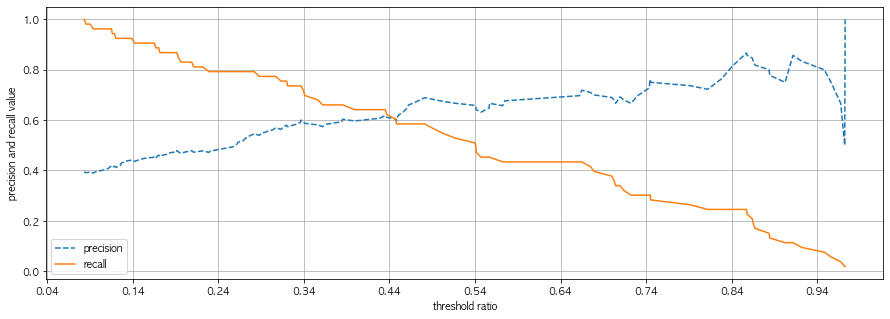

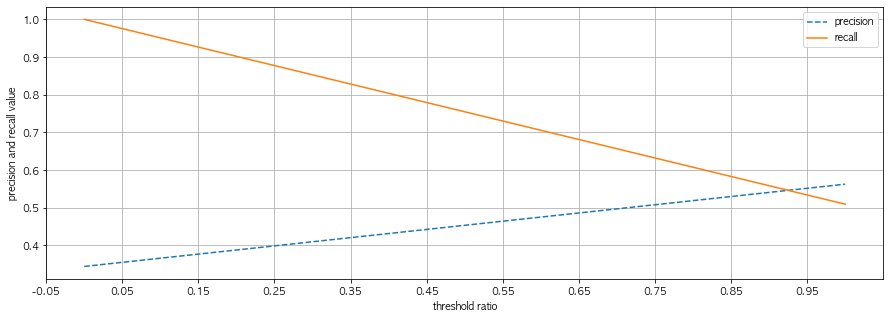

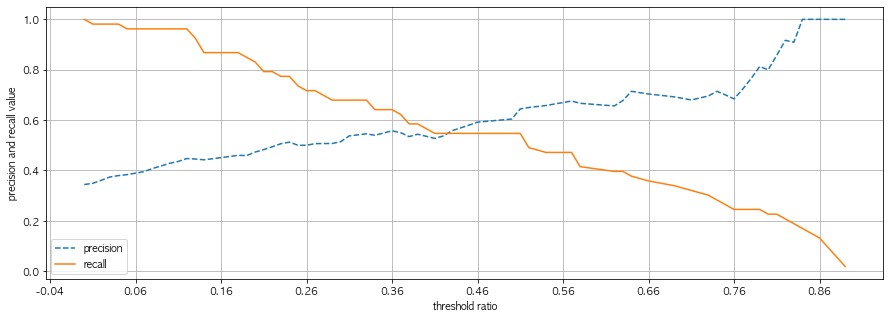

In [183]:
precision_recall_plot(y_test,lr_model_pred_prob)
precision_recall_plot(y_test,dt_model_pred_prob)
precision_recall_plot(y_test,rf_model_pred_prob)

In [120]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [201]:
# print('이상치 처리 후 모델 성능 평가 - ')
# features = diabetes_df.iloc[: , : -1]
# # features
# target   = diabetes_df.iloc[: , -1]
# # target.values

# X_train , X_test , y_train , y_test = train_test_split(features , 
#                                                        target , 
#                                                        test_size = 0.2 , 
#                                                        random_state = 100)

# X_train.shape , X_test.shape , y_train.shape , y_test.shape

이상치 처리 후 모델 성능 평가 - 


((614, 8), (154, 8), (614,), (154,))

In [197]:
# 이상한 데이터들이있다
feature_list = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabetes_df[feature_list] = diabetes_df[feature_list].replace(0,np.nan)
diabetes_df[feature_list] = diabetes_df[feature_list].replace(np.nan,diab.metes_df[feature_list]ean())
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [220]:
features
features = diabetes_df.iloc[: , : -1]
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [219]:
# 이상치 처리후 모델 성능평가
features = diabetes_df.drop('Outcome',axis=1)
label = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=100)

# lr dt rf
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

print('Logistic Regression')
lr_model.fit(X_train,y_train)
lr_y_predict = lr_model.predict(X_test)
lr_model_pred_prob = lr_model.predict_proba(X_test)[:,1]
metrics_evaluation_auc(y_test,lr_y_predict,lr_model_pred_prob)

print('Decision Tree')
dt_model.fit(X_train,y_train)
dt_y_predict = dt_model.predict(X_test)
dt_model_pred_prob = dt_model.predict_proba(X_test)[:,1]
metrics_evaluation_auc(y_test,dt_y_predict,dt_model_pred_prob)

print('Random Forest')
rf_model.fit(X_train,y_train)
rf_y_predict = rf_model.predict(X_test)
rf_model_pred_prob = rf_model.predict_proba(X_test)[:,1]
metrics_evaluation_auc(y_test,rf_y_predict,rf_model_pred_prob)

Logistic Regression
confusion_matrix 
 [[84 17]
 [29 24]] 
accuracy: 0.7012987012987013 recall: 0.4528301886792453 precision: 0.5853658536585366 f1 score: 0.5106382978723404 auc score: 0.7578927704091163 
Decision Tree
confusion_matrix 
 [[85 16]
 [21 32]] 
accuracy: 0.7597402597402597 recall: 0.6037735849056604 precision: 0.6666666666666666 f1 score: 0.6336633663366337 auc score: 0.722678871660751 
Random Forest
confusion_matrix 
 [[84 17]
 [30 23]] 
accuracy: 0.6948051948051948 recall: 0.4339622641509434 precision: 0.575 f1 score: 0.49462365591397855 auc score: 0.7572389314403137 


In [140]:
# 스케일링 후 다시 학습
std_imputer = StandardScaler()
features_scaled = std_imputer.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features_scaled,label,test_size=0.2,random_state=100)

# lr dt rf
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

print('Linear Regression')
lr_model.fit(X_train,y_train)
lr_y_predict = lr_model.predict(X_test)
lr_model_pred_prob = lr_model.predict_proba(X_test)[:,1]
metrics_evaluation_auc(y_test,lr_y_predict,lr_model_pred_prob)

print('Decision Tree')
dt_model.fit(X_train,y_train)
dt_y_predict = dt_model.predict(X_test)
dt_model_pred_prob = dt_model.predict_proba(X_test)[:,1]
metrics_evaluation_auc(y_test,dt_y_predict,dt_model_pred_prob)

print('Random Forest')
rf_model.fit(X_train,y_train)
rf_y_predict = rf_model.predict(X_test)
rf_model_pred_prob = rf_model.predict_proba(X_test)[:,1]
metrics_evaluation_auc(y_test,rf_y_predict,rf_model_pred_prob)

Linear Regression
confusion_matrix 
 [[85 16]
 [26 27]] accuracy: 0.7272727272727273 recall: 0.5094339622641509 precision: 0.627906976744186 f1 score: 0.5625 auc score: 0.7838595180272745 
Decision Tree
confusion_matrix 
 [[83 18]
 [23 30]] accuracy: 0.7337662337662337 recall: 0.5660377358490566 precision: 0.625 f1 score: 0.594059405940594 auc score: 0.6939099570334392 
Random Forest
confusion_matrix 
 [[84 17]
 [28 25]] accuracy: 0.7077922077922078 recall: 0.4716981132075472 precision: 0.5952380952380952 f1 score: 0.5263157894736842 auc score: 0.7525686530917243 


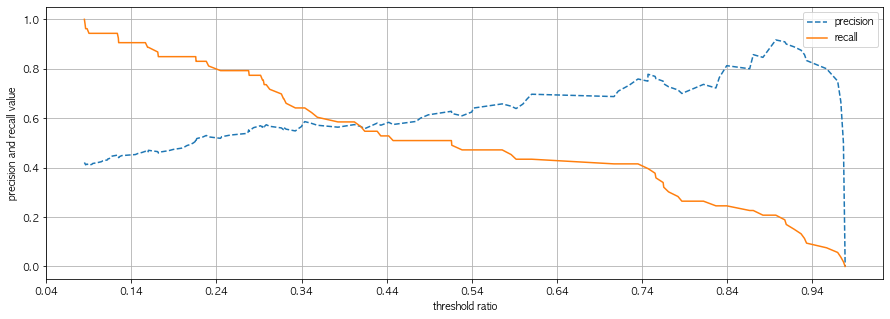

In [146]:
precision_recall_plot(y_test,lr_model_pred_prob)

In [152]:
user_th = 0.3 
print('Decision Tree')

predict_proba_positive = lr_model_pred_prob.reshape(-1, 1)
# predict_proba_positive

user_pred = Binarizer(threshold = user_th).fit_transform(predict_proba_positive)
# user_pred
print('threshold 가 0.2 일때 - ')
print()
metrics_evaluation(y_test , user_pred)

Decision Tree
threshold 가 0.2 일때 - 

confusion_matrix 
 [[72 29]
 [15 38]] 
accuracy: 0.7142857142857143 recall: 0.7169811320754716 precision: 0.5671641791044776 f1 score: 0.6333333333333333 


In [158]:
def show_result_by_threshold(y_test,proba,threshold_list):
    for threshold in threshold_list:
        user_th = threshold 
        predict_proba_positive = proba
        user_pred = Binarizer(threshold = user_th).fit_transform(proba)
        # user_pred
        print(f'threshold 가 {user_th} 일때 - ')
        print()
        metrics_evaluation(y_test , user_pred)
        print('*'*100)
threshold_list = np.arange(0.34,0.44,0.01)
predict_proba_positive = lr_model_pred_prob.reshape(-1, 1)
show_result_by_threshold(y_test,predict_proba_positive,threshold_list)

threshold 가 0.34 일때 - 

confusion_matrix 
 [[75 26]
 [19 34]] 
accuracy: 0.7077922077922078 recall: 0.6415094339622641 precision: 0.5666666666666667 f1 score: 0.6017699115044247 
****************************************************************************************************
threshold 가 0.35000000000000003 일때 - 

confusion_matrix 
 [[77 24]
 [20 33]] 
accuracy: 0.7142857142857143 recall: 0.6226415094339622 precision: 0.5789473684210527 f1 score: 0.6 
****************************************************************************************************
threshold 가 0.36000000000000004 일때 - 

confusion_matrix 
 [[77 24]
 [22 31]] 
accuracy: 0.7012987012987013 recall: 0.5849056603773585 precision: 0.5636363636363636 f1 score: 0.5740740740740741 
****************************************************************************************************
threshold 가 0.37000000000000005 일때 - 

confusion_matrix 
 [[77 24]
 [22 31]] 
accuracy: 0.7012987012987013 recall: 0.5849056603773585 precision: 